In [28]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats
import matplotlib.pyplot as plt
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot

In [29]:
df = pd.read_csv('Development Index.csv')

In [30]:
df.head()

,Population,Area (sq. mi.),Pop. Density,GDP ($ per capita),Literacy (%),Infant mortality,Development Index
0,9944201,1284000,7.7,1200,47.5,93.82,2
1,5450661,43094,126.5,31100,100.0,4.56,4
2,26783383,437072,61.3,1500,40.4,50.25,2
3,9439,102,92.5,3400,97.0,7.35,4
4,3431932,176220,19.5,12800,98.0,11.95,3


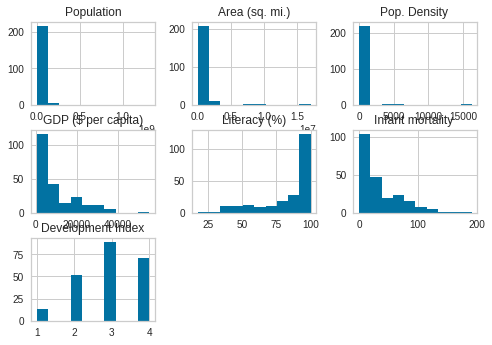

In [31]:
hist = df.hist()

In [32]:
for name, content in df.iteritems():
    stat, p = stats.shapiro(df[name])
    print('Field=%s, Statistics=%.5f, p-value=%.20f' % (name, stat, p))
    
stat1, p1 = stats.shapiro(df)
print('Statistics=%.5f, p-value=%.20f' % (stat1, p1))

Field=Population, Statistics=0.21025, p-value=0.00000000000000000000
Field=Area (sq. mi.), Statistics=0.33794, p-value=0.00000000000000000000
Field=Pop. Density , Statistics=0.19112, p-value=0.00000000000000000000
Field=GDP ($ per capita), Statistics=0.82368, p-value=0.00000000000000295634
Field=Literacy (%), Statistics=0.78405, p-value=0.00000000000000006416
Field=Infant mortality , Statistics=0.82505, p-value=0.00000000000000340946
Field=Development Index, Statistics=0.85028, p-value=0.00000000000005542899
Statistics=0.05966, p-value=0.00000000000000000000


In [33]:
predict_columns = ['Population']
predictors = list(set(list(df.columns))-set(predict_columns))
#df[predictors] = df[predictors]/df[predictors].max()
df[predictors].head()

,Pop. Density,GDP ($ per capita),Literacy (%),Development Index,Infant mortality,Area (sq. mi.)
0,7.7,1200,47.5,2,93.82,1284000
1,126.5,31100,100.0,4,4.56,43094
2,61.3,1500,40.4,2,50.25,437072
3,92.5,3400,97.0,4,7.35,102
4,19.5,12800,98.0,3,11.95,176220


In [34]:
X = df[predictors].values
y = df[predict_columns].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [35]:
rr = Ridge(normalize=True)
rr.fit(X, y)
pred_train_rr= rr.predict(X_train)
print("Правильность на train наборе: {:.2f}".format(rr.score(X_train, y_train)))
print(np.sqrt(mean_squared_error(y_train,pred_train_rr)))
print(r2_score(y_train, pred_train_rr))

Правильность на train наборе: 0.13
85598626.64879078
0.12819922213308665


In [36]:
pred_test_rr= rr.predict(X_test)
print("Правильность на test наборе: {:.2f}".format(rr.score(X_test, y_test)))
print(np.sqrt(mean_squared_error(y_test,pred_test_rr)))
print(r2_score(y_test, pred_test_rr))

Правильность на test наборе: 0.20
155277245.17405805
0.2002387986823827


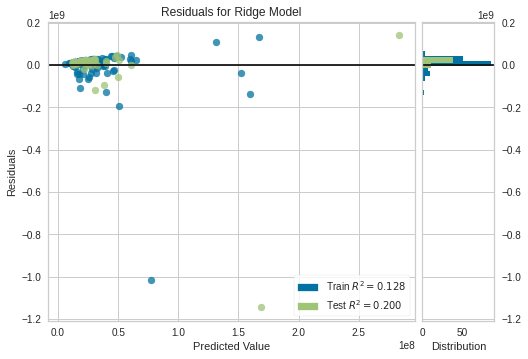

<AxesSubplot:title={'center':'Residuals for Ridge Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [37]:
visualizer = ResidualsPlot(rr)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)  
visualizer.show()

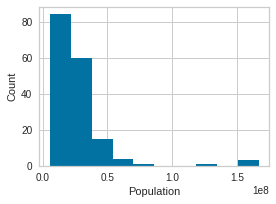

In [38]:
plt.figure(figsize=(4, 3))
plt.hist(pred_train_rr)
plt.xlabel('Population')
plt.ylabel('Count')
plt.tight_layout()

In [39]:
ridgecv = RidgeCV(alphas = 1.0, normalize = True)
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

1.0

In [40]:
ridge4 = Ridge(alpha = ridgecv.alpha_, normalize = True)
ridge4.fit(X_train, y_train)
np.sqrt(mean_squared_error(y_test, ridge4.predict(X_test)))

159288100.75829554